### Problem statment:

With increased number of energy reports from international and business organizations, it is now necessary to have an idea where trends are heading in the energy debate. 

One way to see were trends are is to get the main keywords or the main themes of discussions through processing words from published energy reports. 

### The Goal

produce a wordbacg for each report.

In [1]:
#!pip install PyPDF2

In [18]:
import os
import pandas as pd
import sys
import re
import time
import PyPDF2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords');
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def getPageCount(pdf_file):

    pdfFileObj = open(pdf_file, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pages = pdfReader.numPages
    return pages

In [4]:
def extractData(pdf_file, page):

    pdfFileObj = open(pdf_file, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pageObj = pdfReader.getPage(page)
    data = pageObj.extractText()
    return data

In [5]:
def getWordCount(data):

    data=data.split()
    return len(data)

In [6]:
numPages = getPageCount('FINAL- 2021 GECF GGO2050-09 Feb 2022.pdf')

In [7]:
data = extractData('FINAL- 2021 GECF GGO2050-09 Feb 2022.pdf', 10)

In [8]:
text_total = " "
for i in range(numPages):
    text = extractData('FINAL- 2021 GECF GGO2050-09 Feb 2022.pdf', i)
    text_total = text_total+text

text_total

'  \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n\n \n\n \n\n\n \n\n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \nD\nISCLAIMER\n \nThe data, forecasts, analysis, and/or any information contained within this Outlook are \nfor information purposes only and are provided on a non\n-\nreliance basis. The forecasts \nhave been quantified and prepared on a best\n-\neffort basis through the use of the GE\nCF \nGlobal Gas Model (GGM) reference case and alternative scenarios and any obligation \nand responsibility are hereby disclaimed with respect to such content which no warranty \nor guarantee is provided. Neither the GECF, any of the GECF Members and Observer \nC\n\npreserving\n \ntheir rights with respect thereto, shall assume any liability or responsibility for the content \nof the Outlook or the eventual use of these forecasts, analysis or the re\nsults of any \nreliance on or actions taken on the basis of information contained in this report and any \ndata, analysis, or any other information

In [9]:
# remove special charachters 

def remove_special(text):
    marks = ['(',')','[',']', '?', '.', ':', ',', '\n']
    for x in text:
        if x in marks:
            text = text.replace(x,"")
    return(text)
text_total = remove_special(text_total)

In [10]:
text_total = text_total.lower()

In [11]:
#Tokenize 
text_total = word_tokenize(text_total)

In [12]:
#stemming

stemmed_text = []
porter = PorterStemmer()
for x in text_total:
    x = porter.stem(x)
    stemmed_text.append(x)
    stemmed_text

In [12]:
len(stemmed_text)

111776

In [13]:
# join total text in a single sentence
text_total = " ".join(text_total)

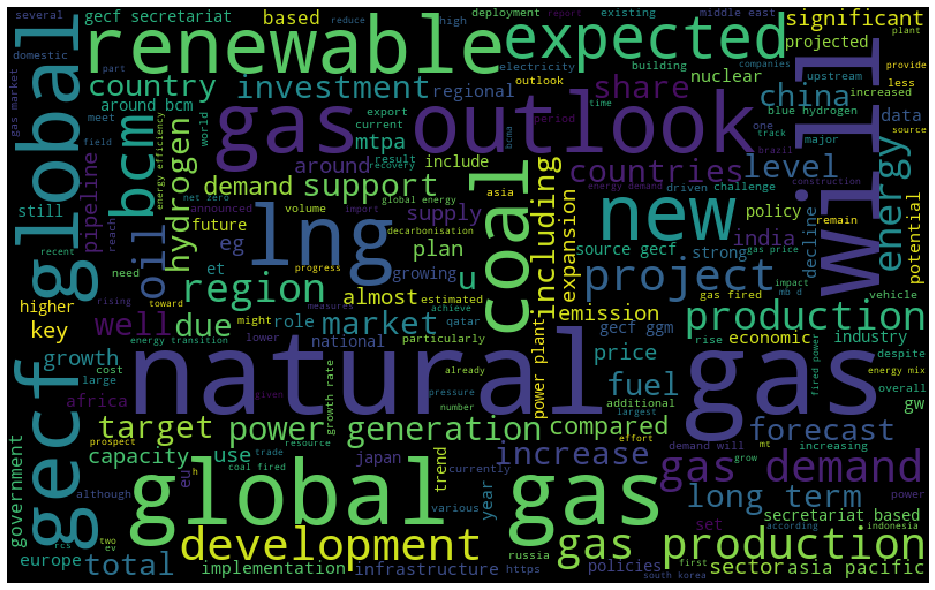

In [14]:
# create a wordbag
# visualization of the stemmed sentences

from wordcloud import WordCloud
wordcloud_low = WordCloud( width = 800, height = 500, random_state = 24,
                         max_font_size = 100).generate(text_total)
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud_low)
plt.tight_layout(pad = 0)
plt.show()

### Count the occurance of each word in the text

In [15]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [31]:
word_count_dic = word_count(text_total)

#### convert the resulting dictionary into a dataframe  

In [45]:
total_text_count = pd.DataFrame.from_dict(word_count_dic, orient ='index')

In [47]:
total_text_count.reset_index(inplace = True)

In [49]:
total_text_count.columns = ['word', 'word count']

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc3e2546c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc3d916dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc3e252bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc3d908108>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc3d907a48>],
 'means': []}

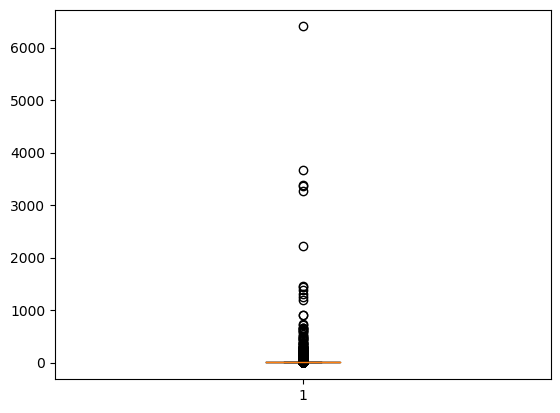

In [57]:
#create a box plot of the distribution of word counts
plt.boxplot(total_text_count['word count'])

In [70]:
#choose only words that are repeated more than 50 times
total_text_count_100 = total_text_count[total_text_count['word count']>100]

In [71]:
# sort values
total_text_count_100 = total_text_count_100.sort_values('word count',  ascending=False)

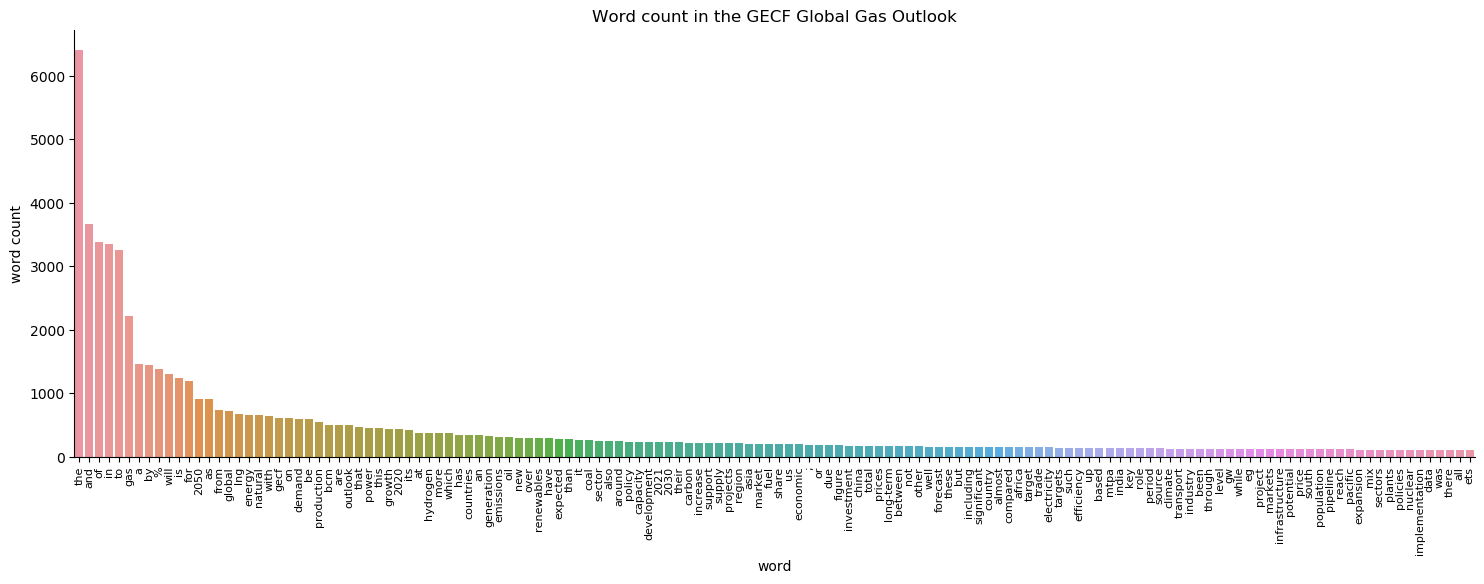

In [74]:
# plot the outcome
import seaborn as sns
sns.catplot(
    data=total_text_count_100,
    x='word',
    y='word count',
    kind = 'bar',
    height=5, # make the plot 5 units high
    aspect=3); # height should be three times width
plt.title('Word count in the GECF Global Gas Outlook' )
plt.xticks(rotation=90, fontsize= 8)

plt.show()